In [1]:
import matplotlib
matplotlib.use('agg')
import cPickle as pickle
import os; import sys; sys.path.append('../../')
import gp
import gp.nets as nets


Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearnNEW/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
input_image, input_prob, input_gold, input_rhoana, dojo_bbox = gp.Legacy.read_dojo_data()

In [42]:
import cPickle as pickle
import numpy as np

In [63]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [60]:
def aRE(gt, seg):
  # total_vi = 0
  slice_vi = []    

  if type(gt) is list:
    z_s = len(gt)
  else:
    z_s = gt.shape[0]

  for i in range(z_s):
      current_vi = gp.metrics.adapted_rand(seg[i].astype(np.int64), gt[i].astype(np.int64))
      # total_vi += current_vi
      slice_vi.append(current_vi)
  # total_vi /= 10
  return np.mean(slice_vi), np.median(slice_vi), slice_vi

In [68]:
#
# baseline aRE
#
baseline = aRE(input_gold, input_rhoana)

In [87]:
gp_experts = ['E1', 'E3']
gp_experts_results = []
gp_experts_mean = [0]*10
for e in gp_experts:
    with open('/home/d/GPSTUDY/'+e+'/ui_results.p', 'r') as f:
        result = pickle.load(f)  
        
    randerror = aRE(input_gold, result)
    gp_experts_results.append(randerror[2])

for i in range(10):
    gp_experts_mean[i] = (gp_experts_results[0][i] + gp_experts_results[1][i]) / 2.
    
fp_experts = ['E2', 'E4']
fp_experts_results = []
fp_experts_mean = [0]*10
for e in fp_experts:
    with open('/home/d/GPSTUDY/'+e+'/ui_results.p', 'r') as f:
        result = pickle.load(f)  
        
    randerror = aRE(input_gold, result)
    fp_experts_results.append(randerror[2])

for i in range(10):
    fp_experts_mean[i] = (fp_experts_results[0][i] + fp_experts_results[1][i]) / 2.
    

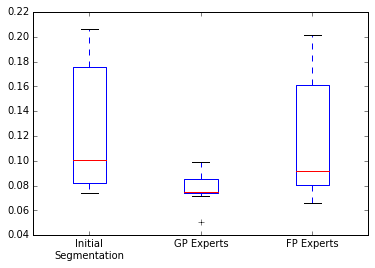

In [91]:
fig = plt.figure()
boxplot = plt.boxplot([baseline[2], gp_experts_mean, fp_experts_mean], labels=['Initial\nSegmentation', 'GP Experts', 'FP Experts'])

In [92]:
FP_USERS = []
GP_USERS = []
FP_EXPERTS = []
GP_EXPERTS = []
with open('/home/d/GPSTUDY/study.csv', 'r') as f:
    lines = f.readlines()
for l in lines[1:]:
    line = l.strip('\n').split(',')
    userid = line[3]
    method = line[4]
    if method == 'FP':
        if userid.startswith('E'):
            FP_EXPERTS.append(userid)
        else:
            FP_USERS.append(userid)
    elif method == 'GP':
        if userid.startswith('E'):
            GP_EXPERTS.append(userid)
        else:
            GP_USERS.append(userid)

            
            

In [97]:
gp_users_results = []
gp_users_mean = [0]*10

for u in GP_USERS:
    with open('/home/d/GPSTUDY/'+u+'/ui_results.p', 'r') as f:
        result = pickle.load(f)  
        
    randerror = aRE(input_gold, result)
    gp_users_results.append(randerror[2])

for cur_slice in range(10):
    cur_mean = 0
    for cur_user in range(len(gp_users_results)):
        cur_mean += gp_users_results[cur_user][cur_slice]
        
    cur_mean /= len(gp_users_results)
    gp_users_mean[cur_slice] = cur_mean
    

In [98]:
fp_users_results = []
fp_users_mean = [0]*10

for u in FP_USERS:
    with open('/home/d/GPSTUDY/'+u+'/ui_results.p', 'r') as f:
        result = pickle.load(f)  
        
    randerror = aRE(input_gold, result)
    fp_users_results.append(randerror[2])

for cur_slice in range(10):
    cur_mean = 0
    for cur_user in range(len(fp_users_results)):
        cur_mean += fp_users_results[cur_user][cur_slice]
        
    cur_mean /= len(fp_users_results)
    fp_users_mean[cur_slice] = cur_mean
    

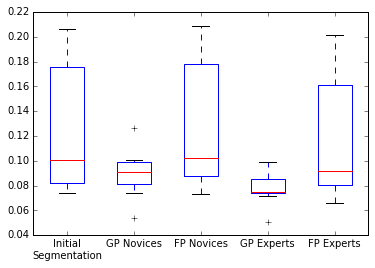

In [104]:
fig = plt.figure()
boxplot = plt.boxplot([baseline[2], gp_users_mean, fp_users_mean, gp_experts_mean, fp_experts_mean], labels=['Initial\nSegmentation', 'GP Novices', 'FP Novices', 'GP Experts', 'FP Experts'])

plt.savefig('/tmp/are_plot.pdf')

In [107]:
np.mean(fp_users_mean), np.median(fp_users_mean)

(0.12787917918348729, 0.10234114562900262)

In [108]:
baseline[0], baseline[1]

(0.12630588260121997, 0.10059346243961259)

In [109]:
np.mean(gp_users_mean), np.median(gp_users_mean)

(0.089607997907397596, 0.090660123702937648)

In [111]:
gp_users_mean

[0.05396899632110682,
 0.073915879652360794,
 0.082872883201478884,
 0.080822622137614236,
 0.10042536934549466,
 0.086172313363165207,
 0.12660995484971466,
 0.095147934042710089,
 0.10034961351331115,
 0.095794412647019433]

In [114]:
np.round(baseline[2],2)

array([ 0.07,  0.08,  0.08,  0.08,  0.1 ,  0.1 ,  0.18,  0.19,  0.21,  0.17])

In [115]:
np.round(gp_users_mean,2)

array([ 0.05,  0.07,  0.08,  0.08,  0.1 ,  0.09,  0.13,  0.1 ,  0.1 ,  0.1 ])

In [116]:
np.round(fp_users_mean,2)

array([ 0.07,  0.08,  0.09,  0.09,  0.1 ,  0.1 ,  0.18,  0.18,  0.21,  0.17])

In [117]:
np.round(gp_experts_mean,2)

array([ 0.05,  0.07,  0.08,  0.07,  0.08,  0.07,  0.1 ,  0.09,  0.09,  0.07])

In [137]:
print ' & '.join(["{:.3f}".format(float(v)) for v in np.round(baseline[2],3)])
print ' & '.join(["{:.3f}".format(float(v)) for v in np.round(gp_users_mean,3)])
print ' & '.join(["{:.3f}".format(float(v)) for v in np.round(fp_users_mean,3)])
print ' & '.join(["{:.3f}".format(float(v)) for v in np.round(gp_experts_mean,3)])
print ' & '.join(["{:.3f}".format(float(v)) for v in np.round(fp_experts_mean,3)])

0.074 & 0.081 & 0.085 & 0.079 & 0.103 & 0.098 & 0.176 & 0.188 & 0.206 & 0.174
0.054 & 0.074 & 0.083 & 0.081 & 0.100 & 0.086 & 0.127 & 0.095 & 0.100 & 0.096
0.073 & 0.082 & 0.086 & 0.091 & 0.102 & 0.103 & 0.182 & 0.184 & 0.209 & 0.167
0.051 & 0.074 & 0.075 & 0.071 & 0.078 & 0.075 & 0.099 & 0.088 & 0.094 & 0.074
0.066 & 0.080 & 0.078 & 0.087 & 0.083 & 0.096 & 0.163 & 0.174 & 0.202 & 0.155


In [132]:
print ' & '.join(["{:.3f}".format(float(v)) for v in np.round(baseline[2],3)])
print ' & '.join(["{:.3f}".format(baseline[2][i]-float(v)) for i,v in enumerate(np.round(gp_users_mean,3))])
print ' & '.join(["{:.3f}".format(baseline[2][i]-float(v)) for i,v in enumerate(np.round(fp_users_mean,3))])
print ' & '.join(["{:.3f}".format(baseline[2][i]-float(v)) for i,v in enumerate(np.round(gp_experts_mean,3))])
print ' & '.join(["{:.3f}".format(baseline[2][i]-float(v)) for i,v in enumerate(np.round(fp_experts_mean,3))])

0.074 & 0.081 & 0.085 & 0.079 & 0.103 & 0.098 & 0.176 & 0.188 & 0.206 & 0.174
0.020 & 0.007 & 0.002 & -0.002 & 0.003 & 0.012 & 0.049 & 0.093 & 0.106 & 0.078
0.001 & -0.001 & -0.001 & -0.012 & 0.001 & -0.005 & -0.006 & 0.004 & -0.003 & 0.007
0.023 & 0.007 & 0.010 & 0.008 & 0.025 & 0.023 & 0.077 & 0.100 & 0.112 & 0.100
0.008 & 0.001 & 0.007 & -0.008 & 0.020 & 0.002 & 0.013 & 0.014 & 0.004 & 0.019
